# **Build The vanilla RAG**

In [5]:
from langchain.document_loaders import TextLoader
from langchain.schema import Document
import glob, os
from dotenv import load_dotenv
load_dotenv()

True

## **Load all text data**

In [9]:
phone_docs = []
for file_path in glob.glob("../data/*.txt"):
    loader = TextLoader(file_path)
    doc = loader.load()[0]
    phone_name = os.path.basename(file_path).replace(".txt", "")
    doc.metadata = {
        "phone_name": phone_name,
        "phone_brand": "samsung"
    }
    phone_docs.append(doc)

len(phone_docs)


21

In [10]:
phone_docs[-1]

Document(metadata={'phone_name': 'samsung_galaxy_s25_ultra', 'phone_brand': 'samsung'}, page_content='--- Name ---\nSamsung Galaxy S25 Ultra\n\n--- Network ---\nTechnology: GSM / CDMA / HSPA / EVDO / LTE / 5G\n2G bands: GSM 850 / 900 / 1800 / 1900\n: 1, 2, 5, 7, 25, 28, 41, 66, 71, 77, 78, 257, 258, 260, 261 SA/NSA/Sub6/mmWave - USA unlocked\n3G bands: HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100\n4G bands: 1, 2, 3, 4, 5, 7, 8, 12, 13, 17, 18, 19, 20, 25, 26, 28, 32, 38, 39, 40, 41, 66 - International\n5G bands: 1, 2, 3, 5, 7, 8, 12, 20, 25, 26, 28, 38, 40, 41, 66, 75, 77, 78 SA/NSA/Sub6 - International\nSpeed: HSPA, LTE (up to 7CA), 5G\n\n--- Launch ---\nAnnounced: 2025, January 22\nStatus: Available. Released 2025, February 03\n\n--- Body ---\nDimensions: 162.8 x 77.6 x 8.2 mm (6.41 x 3.06 x 0.32 in)\nWeight: 218 g (7.69 oz)\nBuild: Glass front (Corning Gorilla Armor 2), glass back (Gorilla Glass Victus 2), titanium frame (grade 5)\nSIM: Nano-SIM + Nano-SIM + eSIM + eSIM (max 2 at a tim

## **Load the HuggingFace Sentence Embedding Model**

In [11]:
from langchain_groq import ChatGroq

os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
llm = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
llm.invoke("test line")

AIMessage(content="It looks like you're testing something! Is everything working as expected?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 12, 'total_tokens': 26, 'completion_time': 0.028156289, 'prompt_time': 0.002190824, 'queue_time': 0.212537525, 'total_time': 0.030347113}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_79da0e0073', 'finish_reason': 'stop', 'logprobs': None}, id='run--50c35908-a215-4dbf-bf1c-a016314f55f2-0', usage_metadata={'input_tokens': 12, 'output_tokens': 14, 'total_tokens': 26})

## Checking embedding Damnation

In [12]:
len(embeddings.embed_query("Test"))

768

## **FlatIndexing and Cloud Vector db `Pinecone`**
- Flat-index for exact matching

In [13]:
from pinecone import Pinecone
os.environ["PINECONE_API_KEY"] = os.getenv("PINECONE_API_KEY")

pinecone_api_key = os.getenv("PINECONE_API_KEY")

In [14]:
pc = Pinecone(api_key=pinecone_api_key)

In [15]:
from pinecone import ServerlessSpec ## you are not going to mange the server. and its managed by the cloud provider.
## create index
index_name = "samsung-db"

if not pc.has_index(index_name):
    pc.create_index(
    name=index_name,
    dimension=768,
    metric="dotproduct",
    spec=ServerlessSpec(
        cloud="aws",
        region="us-east-1"
    )
)

## **Load the db**

In [16]:
index = pc.Index(index_name)
index

In [17]:
from langchain_pinecone import PineconeVectorStore

vector_store = PineconeVectorStore(index=index, embedding=embeddings)
vector_store

In [18]:
vector_store.add_documents(documents=phone_docs)

['75af2e7c-d382-4cd7-af9e-d1fe3163bd9c',
 '598f1b7a-4391-409d-a1b7-440221ec907e',
 '3aa358fe-2c79-481e-b08e-0b098ce290d9',
 '3fd3d815-3e3d-4396-a56f-d0ff06dbfc4d',
 'dcc92797-a357-4554-ba6a-29ef9817ce42',
 '672ffe82-aa89-4fc0-951a-854219340f28',
 '4ce458b7-6514-46bd-963a-3ff8cfb8ac5f',
 'b18f494e-ff22-4fb4-afee-a7e9d58c620f',
 '15ff64a7-40b6-4605-80ef-68811c73aaad',
 '6cf7492b-bea7-4c2e-a8bb-7db89cd03dd7',
 '8d46dfd6-41cf-463c-a69d-992acd37645f',
 'f553a5c7-6a2e-4bf9-91ed-bd877d109ce7',
 'd28b9117-6dde-41b3-9d40-400eb1a67bc0',
 '2396761f-32ed-4dc1-ae32-5d951c3499f1',
 '1c408348-c5bf-4727-a98a-ea2bb108bbd8',
 'd6bde077-628e-4f3d-a84a-d478e4e67ec7',
 '485aace1-9799-43d0-95df-01067a01c8fd',
 '9c63bf7f-c54f-4087-8f0c-49926e76ed67',
 '6e63d6ed-fec2-436e-911e-a4355e2775df',
 'f90da9ca-6636-4dfe-bc0a-929bb5c6d7fe',
 '29bf7be5-e4f2-4df0-8cf3-566aee86b040']

In [24]:
response = vector_store.similarity_search_with_score(query="What are the camera specs of the Samsung Galaxy S23 ultra")
response[0]

(Document(id='9c63bf7f-c54f-4087-8f0c-49926e76ed67', metadata={'phone_brand': 'samsung', 'phone_name': 'samsung_galaxy_s23_ultra'}, page_content='--- Name ---\nSamsung Galaxy S23 Ultra\n\n--- Network ---\nTechnology: GSM / CDMA / HSPA / EVDO / LTE / 5G\n2G bands: GSM 850 / 900 / 1800 / 1900\n: 1, 7, 28, 41, 66, 71, 78, 258, 260, 261 SA/NSA/Sub6/mmWave - USA\n3G bands: HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100\n4G bands: 1, 2, 3, 4, 5, 7, 8, 12, 13, 17, 18, 19, 20, 25, 26, 28, 32, 38, 39, 40, 41, 66 - International\n5G bands: 1, 2, 3, 5, 7, 8, 12, 20, 25, 28, 38, 40, 41, 66, 75, 77, 78 SA/NSA/Sub6 - International\nSpeed: HSPA, LTE (up to 7CA), 5G\n\n--- Launch ---\nAnnounced: 2023, February 01\nStatus: Available. Released 2023, February 17\n\n--- Body ---\nDimensions: 163.4 x 78.1 x 8.9 mm (6.43 x 3.07 x 0.35 in)\nWeight: 234 g (8.25 oz)\nBuild: Glass front (Gorilla Glass Victus 2), glass back (Gorilla Glass Victus 2), aluminum frame\nSIM: Nano-SIM + eSIMNano-SIM + Nano-SIM + eSIM (max 

In [66]:
retriever = vector_store.as_retriever(
    search_type = "similarity",
    search_kwargs={
        "k": 3
    }
)

In [67]:
response = retriever.invoke("What are the camera specs of the Samsung Galaxy S23 Ultra?")
response

[Document(id='9c63bf7f-c54f-4087-8f0c-49926e76ed67', metadata={'phone_brand': 'samsung', 'phone_name': 'samsung_galaxy_s23_ultra'}, page_content='--- Name ---\nSamsung Galaxy S23 Ultra\n\n--- Network ---\nTechnology: GSM / CDMA / HSPA / EVDO / LTE / 5G\n2G bands: GSM 850 / 900 / 1800 / 1900\n: 1, 7, 28, 41, 66, 71, 78, 258, 260, 261 SA/NSA/Sub6/mmWave - USA\n3G bands: HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100\n4G bands: 1, 2, 3, 4, 5, 7, 8, 12, 13, 17, 18, 19, 20, 25, 26, 28, 32, 38, 39, 40, 41, 66 - International\n5G bands: 1, 2, 3, 5, 7, 8, 12, 20, 25, 28, 38, 40, 41, 66, 75, 77, 78 SA/NSA/Sub6 - International\nSpeed: HSPA, LTE (up to 7CA), 5G\n\n--- Launch ---\nAnnounced: 2023, February 01\nStatus: Available. Released 2023, February 17\n\n--- Body ---\nDimensions: 163.4 x 78.1 x 8.9 mm (6.43 x 3.07 x 0.35 in)\nWeight: 234 g (8.25 oz)\nBuild: Glass front (Gorilla Glass Victus 2), glass back (Gorilla Glass Victus 2), aluminum frame\nSIM: Nano-SIM + eSIMNano-SIM + Nano-SIM + eSIM (max 

## Define Rag Prompt

In [68]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate(
    template="""
You are a helpful AI assistant and an expert at answering Samsung phone-related questions.
Your job is to provide **clear and direct answers** using the correct document.

do not mention this type of response:

example:

    The user is asking about the camera specs of the Samsung Galaxy S23 Ultra.

    After checking the metadata of the retrieved documents, I found an exact match: `samsung_galaxy_s23_ultra`.
Answer clear and direct way like normally answer the user question according the context.

- You will receive two documents as context.
- Only use the document where the metadata `phone_name` exactly matches the phone model in the user's question.
- If no document matches, say: "Sorry, I do not know the answer because the correct phone model was not found in the retrieved context."
- Do not explain how you found the information. Just provide the final answer clearly and concisely.

⚠ Example of phone name matching:  
If the user question mentions **"Samsung Galaxy S23 Ultra"**  
and a document metadata has **phone_name: samsung_galaxy_s23_ultra**  
→ this is an exact match.

---

User question:  
{question}

---

Retrieved documents:  
{context}
""",
    input_variables=["question", "context"]
)


In [ ]:
from langchain_core.runnables import RunnablePassthrough

def format_docs(retriever_docs):
    context_text = ""
    for doc in retriever_docs:
        phone_name = doc.metadata.get("phone_name", "unknown")
        context_text += f"Phone name (metadata): {phone_name}\n"
        context_text += f"{doc.page_content}\n\n"
    # print(context_text)
    return context_text.strip()


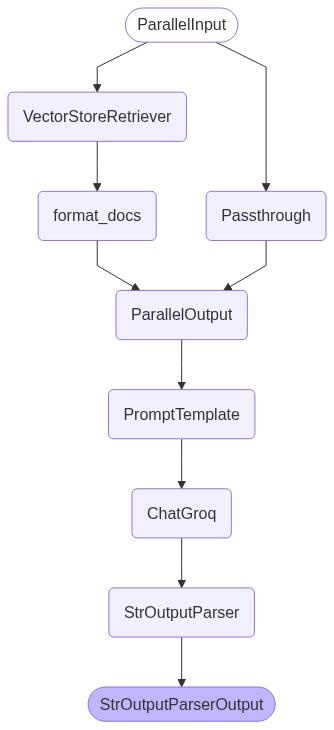

In [70]:

from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

from IPython.display import display, Image
rag_chain = (
    {
        "context": retriever | format_docs,
        "question": RunnablePassthrough()
    }
    | prompt
    | llm
    | StrOutputParser()
)


display(Image(rag_chain.get_graph().draw_mermaid_png()))

In [71]:
question = "Which Samsung phone has the best battery life?"
response = rag_chain.invoke(question)
print(response)

The Samsung Galaxy A55 and Galaxy A26 have a 5000 mAh battery with 25W wired charging. However, the Galaxy A55 has a slightly better battery life with an active use score of 13:27h compared to the Galaxy A26's 10:44h. 

However, I couldn't find information about the battery life of other Samsung phones. If you are looking for a specific model, please let me know.


In [72]:
question = "How does the Galaxy S23 compare to the S24 ultra in terms of performance?"

question = "Which Samsung phone has the best battery life?"
response = rag_chain.invoke(question)
print(response)

To determine which Samsung phone has the best battery life, we need to look at the battery specifications and usage scores of the provided models: Samsung Galaxy A55, Samsung Galaxy F16, and Samsung Galaxy A26.

- Samsung Galaxy A55: The battery type is Li-Ion 5000 mAh, and the active use score is 13:27h.
- Samsung Galaxy F16: The battery type is 5000 mAh, but the active use score isn't provided.
- Samsung Galaxy A26: The battery type is 5000 mAh, and the active use score is 10:44h.

Based on the active use scores, the Samsung Galaxy A55 has the best battery life at 13:27h, followed by the Galaxy A26 at 10:44h. The Samsung Galaxy F16's battery life isn't specified in the provided data.

The Samsung Galaxy A55 has the best battery life among these models.
